In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
data_dir = "./PetImages"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create ImageDataGenerator for data loading
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3
)

# Load training data
train_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Load validation data
val_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 16396 images belonging to 2 classes.
Found 7026 images belonging to 2 classes.


In [5]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2
)

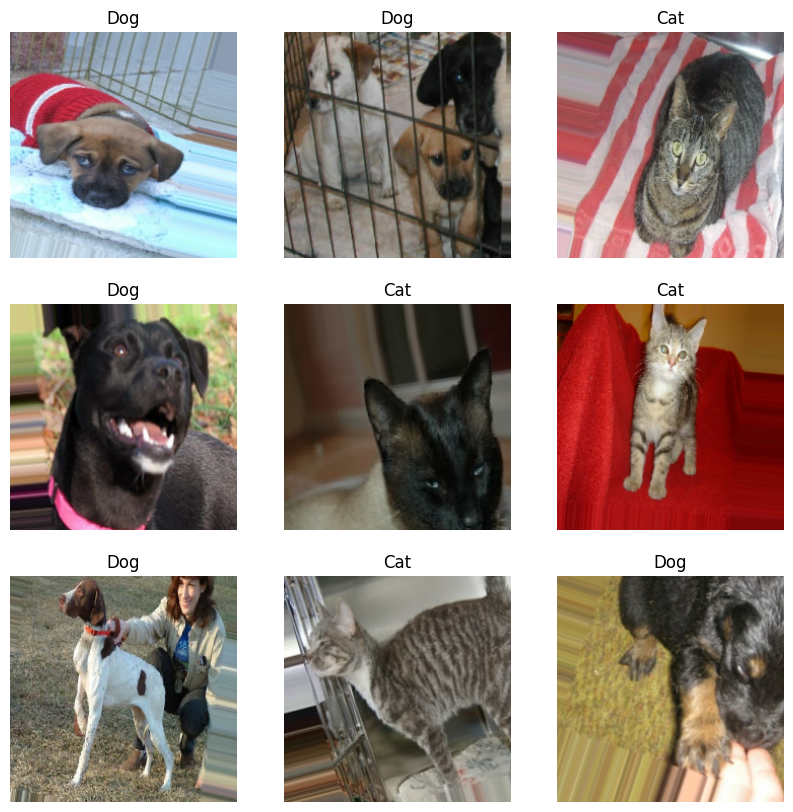

In [6]:
images, labels = next(train_generator)

# Selects 9 random images from dataset and shows labels
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Cat" if labels[i] == 0 else "Dog")
    plt.axis("off")
plt.show()

In [7]:
# Define NN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\Jonah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# Train and evaluate model
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 335s 652ms/step - accuracy: 0.7317 - loss: 0.5343 - val_accuracy: 0.7553 - val_loss: 0.5204 - learning_rate: 0.0010
Epoch 2/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 333s 649ms/step - accuracy: 0.7389 - loss: 0.5318 - val_accuracy: 0.7580 - val_loss: 0.4964 - learning_rate: 0.0010
Epoch 3/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 336s 655ms/step - accuracy: 0.7538 - loss: 0.5184 - val_accuracy: 0.7435 - val_loss: 0.5175 - learning_rate: 0.0010
Epoch 4/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 337s 657ms/step - accuracy: 0.7484 - loss: 0.5167 - val_accuracy: 0.7536 - val_loss: 0.5069 - learning_rate: 0.0010
Epoch 5/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 335s 653ms/step - accuracy: 0.7493 - loss: 0.5082 - val_accuracy: 0.7818 - val_loss: 0.4751 - learning_rate: 5.0000e-04
Epoch 6/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 337s 657ms/step - accuracy: 0.7642 - loss: 0.4934 - val_accuracy: 0.7822 - val_loss: 0.4701 - learning_rate: 5.0000e-04
Epoch 7/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 336s 656ms/step 

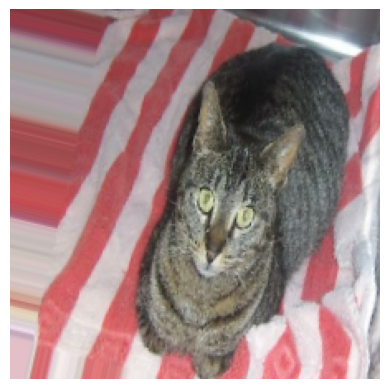

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model says this image is a cat.


In [25]:
# Select random image from dataset and show prediction
idx = np.random.randint(0, len(images))

plt.imshow(images[idx])
plt.axis("off")
plt.show()

pred = model.predict(images[idx].reshape(1, *images[idx].shape))
pred = pred > 0.5

# Determine the result
if pred == 0:
    res = 'cat'
else:
    res = 'dog'

print(f'Model says this image is a {res}.')